## Лабораторная работа 3

## Конева Ксения Сергеевна

## 19-ИВТ-2

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

In [38]:
abalon = pd.read_csv('abalone.data.csv',header = None)
abalon

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
#### Sex - пол (мужской(M), женский(F), маладенец (I))
#### lenght - длина (Самое длинное измерение оболочки)
#### diameter - диаметр (перпендикулярно длине)
#### height - Высота (Высота с мясом в скорлупе)
#### Whole weight - Вес (Весь вес)
####          Shucked weight - Вес (Сброшенный вес)
####       Viscera weight - Вес (Вес внутренних органов)
####     Shell weight - Вес (Вес оболочки)
#### Rings - кольца (+1,5 дает возраст в годах)

In [39]:
abalon.columns = ['Sex','Lenght','Diametr','Height','Whole weight','Shucked weight','Viscera weight','Shel weight','Rings']
abalon

,Sex,Lenght,Diametr,Height,Whole weight,Shucked weight,Viscera weight,Shel weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [40]:
abalon.shape

(4177, 9)

In [41]:
abalon = abalon.drop_duplicates()
abalon.shape

(4177, 9)

# 3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

Sex
F    1307
I    1342
M    1528
Name: Sex, dtype: int64

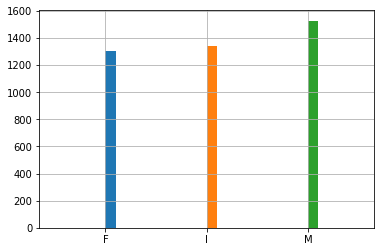

In [42]:
abalon.groupby(['Sex'])['Sex'].hist()
abalon.groupby(['Sex'])['Sex'].count()

# 4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

In [43]:
numerical = [i for i in abalon.columns if abalon[i].dtype.name != 'object']

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Lenght'),
  Text(1, 0, 'Diametr'),
  Text(2, 0, 'Height'),
  Text(3, 0, 'Whole weight'),
  Text(4, 0, 'Shucked weight'),
  Text(5, 0, 'Viscera weight'),
  Text(6, 0, 'Shel weight'),
  Text(7, 0, 'Rings')])

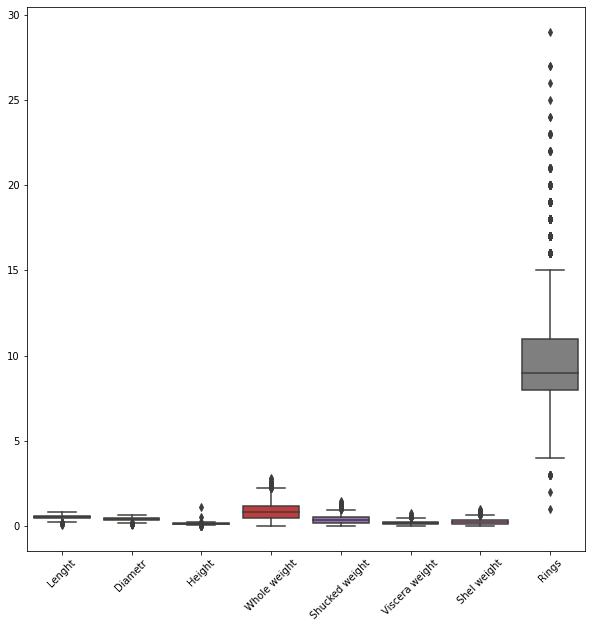

In [44]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=abalon[numerical])
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Lenght'),
  Text(1, 0, 'Diametr'),
  Text(2, 0, 'Height'),
  Text(3, 0, 'Whole weight'),
  Text(4, 0, 'Shucked weight'),
  Text(5, 0, 'Viscera weight'),
  Text(6, 0, 'Shel weight'),
  Text(7, 0, 'Rings')])

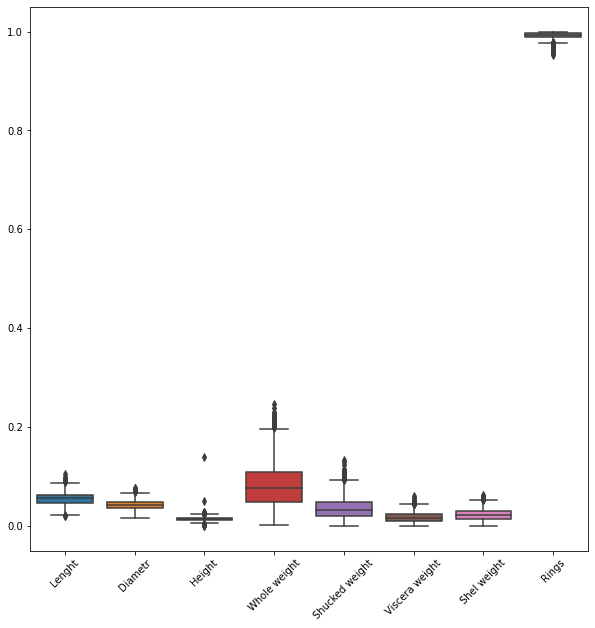

In [45]:
abalon[numerical] = preprocessing.normalize(abalon[numerical])
plt.figure(figsize=(10, 10))
sns.boxplot(data=abalon[numerical])
plt.xticks(rotation=45)

# 5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [46]:
labelEncoder = LabelEncoder() 
abalon["Sex"] = labelEncoder.fit_transform(abalon["Sex"])
abalon

,Sex,Lenght,Diametr,Height,Whole weight,Shucked weight,Viscera weight,Shel weight,Rings
0,2,0.030286,0.024296,0.006324,0.034214,0.014944,0.006723,0.009985,0.998456
1,2,0.049863,0.037754,0.012822,0.032126,0.014175,0.006910,0.009973,0.997268
2,0,0.058506,0.046363,0.014902,0.074733,0.028315,0.015620,0.023182,0.993498
3,2,0.043849,0.036374,0.012457,0.051422,0.021476,0.011361,0.015447,0.996557
4,1,0.047030,0.036342,0.011401,0.029216,0.012755,0.005629,0.007838,0.997611
...,...,...,...,...,...,...,...,...,...
4172,0,0.051029,0.040643,0.014902,0.080111,0.033417,0.021586,0.022489,0.993487
4173,2,0.058476,0.043609,0.013380,0.095742,0.043510,0.021260,0.025819,0.991121
4174,2,0.065675,0.051993,0.022439,0.128723,0.057520,0.031469,0.033713,0.985127
4175,0,0.061798,0.047955,0.014832,0.108221,0.052504,0.025807,0.029268,0.988772


# 6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);


<AxesSubplot:>

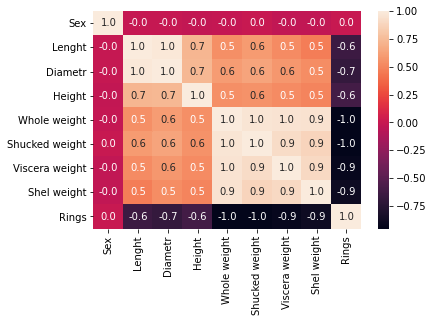

In [47]:
sns.heatmap(abalon.corr(), annot=True, fmt='.1f')

In [48]:
abalon.drop('Whole weight',axis= 1,inplace = True)

# 7. Заполните пропущенные значения в данных;

In [49]:
abalon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int32  
 1   Lenght          4177 non-null   float64
 2   Diametr         4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shel weight     4177 non-null   float64
 7   Rings           4177 non-null   float64
dtypes: float64(7), int32(1)
memory usage: 277.4 KB


# 8. Решите поставленную задачу классификации в соответствии с заданием. 

In [50]:
data_X = np.array(abalon.drop('Sex', axis=1))
data_Y = np.array(abalon['Sex'])
data_Y = label_binarize(data_Y, classes=[0, 1, 2])
n_classes = data_Y.shape[1]

train_x, test_x, train_y, test_y = train_test_split(data_X, data_Y, test_size=0.3)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)

(2923, 7)
(1254, 7)
(2923, 3)


In [51]:
dtc = DecisionTreeClassifier()


dtc_grid = GridSearchCV(dtc, {'max_depth':list(range(1,100)),'max_features':list(range(1,5))})
dtc_grid.fit(train_x,train_y)

best_depth = dtc_grid.best_estimator_.max_depth
best_features = dtc_grid.best_estimator_.max_features

dtc = DecisionTreeClassifier(max_depth = best_depth, max_features = best_features)
dtc.fit(train_x, train_y)
predict = dtc.predict(test_x)
accuracy_score = np.mean(test_y == dtc.predict(test_x))

print('Accuracy of DTC model: ',accuracy_score)
print('Best score: ', dtc_grid.best_score_)
print('On depth ',best_depth,' features ',best_features)


Accuracy of DTC model:  0.6432748538011696
Best score:  0.5063370799672169
On depth  29  features  4


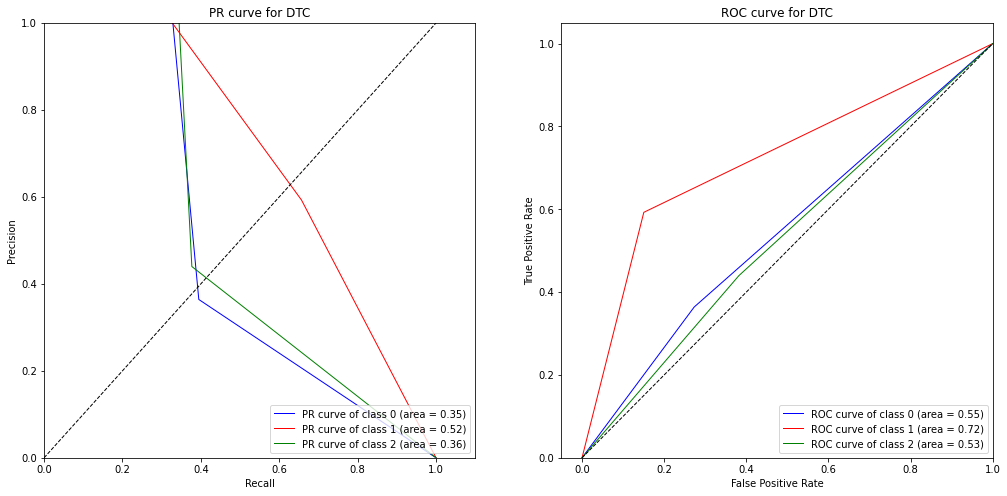

In [52]:
fig, (ax_0, ax_1) = plt.subplots( nrows=1, ncols=2, figsize=(17, 8))  

predict = dtc.predict(test_x)
precision = dict()
recall = dict()
aps = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(test_y[:, i], predict[:, i])
    aps[i] = average_precision_score(test_y[:, i], predict[:, i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    ax_0.plot(precision[i], recall[i], color=color, lw=1,
             label='PR curve of class {0} (area = {1:0.2f})'
             ''.format(i, aps[i]))
ax_0.plot([0, 1], [0, 1], 'k--', lw=1)
ax_0.set_xlim([0.0, 1.1])
ax_0.set_ylim([0.0, 1.0])
ax_0.set_xlabel('Recall')
ax_0.set_ylabel('Precision')
ax_0.set_title('PR curve for DTC')
ax_0.legend(loc="lower right")

predict = dtc.predict(test_x)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y[:, i], predict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
ax_1.plot([0, 1], [0, 1], 'k--', lw=1)
ax_1.set_xlim([-0.05, 1.0])
ax_1.set_ylim([0.0, 1.05])
ax_1.set_xlabel('False Positive Rate')
ax_1.set_ylabel('True Positive Rate')
ax_1.set_title('ROC curve for DTC')
ax_1.legend(loc="lower right")

plt.show()

In [53]:
knn = KNeighborsClassifier()

find = GridSearchCV(knn,{'n_neighbors':range(1,50)})
find.fit(train_x,train_y)

neighbor = find.best_estimator_.n_neighbors
best_score = find.best_score_

knn = KNeighborsClassifier(n_neighbors=neighbor)
knn.fit(train_x,train_y)
predict = knn.predict(test_x)
accuracy_score = np.mean(test_y == knn.predict(test_x))

print('Accuracy of KNN model: ',accuracy_score)
print('Best score: ',best_score,'Neighbor: ',neighbor)


Accuracy of KNN model:  0.6953748006379585
Best score:  0.4844444444444444 Neighbor:  5


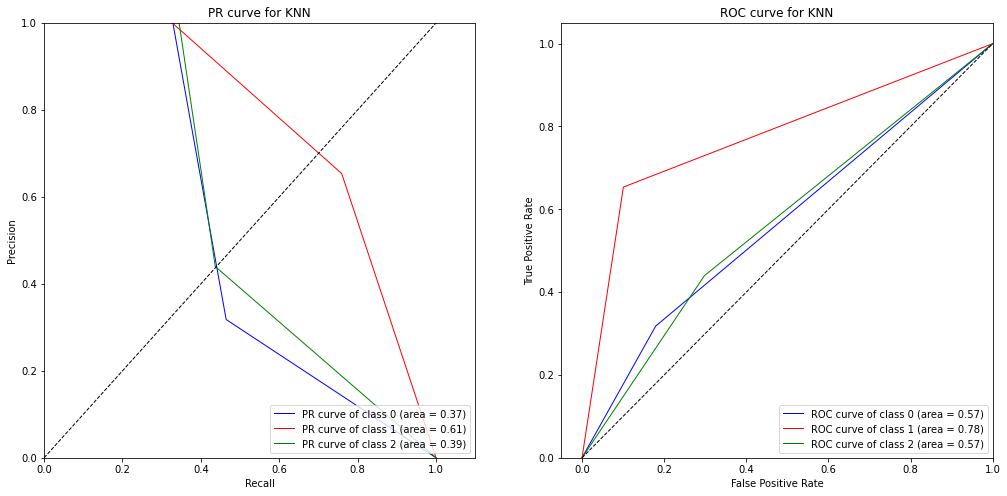

In [54]:
fig, (ax_0, ax_1) = plt.subplots( nrows=1, ncols=2, figsize=(17, 8))  

predict = knn.predict(test_x)
precision = dict()
recall = dict()
aps = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(test_y[:, i], predict[:, i])
    aps[i] = average_precision_score(test_y[:, i], predict[:, i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    ax_0.plot(precision[i], recall[i], color=color, lw=1,
             label='PR curve of class {0} (area = {1:0.2f})'
             ''.format(i, aps[i]))
ax_0.plot([0, 1], [0, 1], 'k--', lw=1)
ax_0.set_xlim([0.0, 1.1])
ax_0.set_ylim([0.0, 1.0])
ax_0.set_xlabel('Recall')
ax_0.set_ylabel('Precision')
ax_0.set_title('PR curve for KNN')
ax_0.legend(loc="lower right")

predict = knn.predict(test_x)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y[:, i], predict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
ax_1.plot([0, 1], [0, 1], 'k--', lw=1)
ax_1.set_xlim([-0.05, 1.0])
ax_1.set_ylim([0.0, 1.05])
ax_1.set_xlabel('False Positive Rate')
ax_1.set_ylabel('True Positive Rate')
ax_1.set_title('ROC curve for KNN')
ax_1.legend(loc="lower right")

plt.show()